# Creating a wildtype (WT / PD0), and Parkinson degeneration (PD2) network

In the directory ```network_path``` we have three sub directories ```PD0```, ```PD2-ref``` and ```PD2```. In order to generate the ```PD2``` network, we degenerate the ```PD0``` network by swapping the WT morphologies for the PD2 morphologies. In addition a subset of the synapses in the ```PD2-ref``` network are added to compensate for differences in pruning.

We need to specify a ```connection_override``` file. The difference compared to the standard connection file is that it contains ```recovery``` information, i.e. the fraction of synapses from the ```PD2-ref``` network that should be added to the ```PD2``` network.

The ```rc``` object is a ```ipyparallel``` ```RemoteClient``` object for parallel execution.

If you want to remap external input that was removed to a new position, then use ```remap_removed_input = True```

In [1]:
import os

network_path = os.path.join("networks","PD-example-2k_NE")
#network_path = os.path.join("networks","PD-example-2_ref_0.9")

network_path_pd0 = os.path.join(network_path, "PD0")
network_path_pd2_ref = os.path.join(network_path, "PD2-ref")
network_path_pd2 = os.path.join(network_path, "PD2")

network_size = 2000
input_config = "test-input.json"  # Only background input will be used in this example

snudda_data_base_path = os.path.join("..", "..", "..", "..", "BasalGangliaData", "Parkinson", "20220225")
snudda_data_pd0 = os.path.join(snudda_data_base_path, "PD0")
snudda_data_pd2 = os.path.join(snudda_data_base_path, "PD2")

network_config_pd0 = os.path.join(snudda_data_base_path, "connectivity", "network-config.json")
network_config_pd2 = os.path.join(snudda_data_base_path, "connectivity", "network-config-PD-synapse-recovery.json")

input_pd0 = os.path.join(network_path_pd0, "input-spikes.hdf5")
input_pd2 = os.path.join(network_path_pd2, "input-spikes.hdf5")

# Do we want to remap removed input?
remap_removed_input = False
remapped_fraction = 0.0

# Do we want to remap removed input?
#remap_removed_input = True
#remapped_fraction = 0.9

rc = None

## First generate the WT reference network

In [2]:
from snudda import SnuddaInit

si = SnuddaInit(network_path=network_path_pd0, random_seed=123456, snudda_data=snudda_data_pd0,
                struct_def={"Striatum": network_size}, connection_override_file=network_config_pd0)

Adding Striatum with 2000 neurons
Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum
Adding neurons: FS from dir /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs
No parameter.json file.
No parameter.json file.
No parameter.json file.
No parameter.json file.
Parameter file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/0/parameters.json
Mechanism file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/0/mechanisms.json
Parameter file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/1/parameters.json
Mechanism file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/1/mechanisms.json
Parameter file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/2/parameters.json
Mechanism file not found: /home

In [3]:
from snudda import SnuddaPlace
sp = SnuddaPlace(network_path=network_path_pd0, verbose=False, rc=rc)
sp.place()

Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20220225/PD0 from networks/PD-example-2k_NE/PD0/network-config.json


In [4]:
from snudda import SnuddaDetect

sd = SnuddaDetect(network_path=network_path_pd0, rc=rc)
sd.detect()

Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20220225/PD0 from networks/PD-example-2k_NE/PD0/network-config.json
No d_view specified, running distribute neurons in serial
Processing hyper voxel : 98/252 (1998 neurons)
Processing hyper voxel : 97/252 (1586 neurons)
Processing hyper voxel : 104/252 (1562 neurons)
Processing hyper voxel : 56/252 (1312 neurons)
Processing hyper voxel : 140/252 (1169 neurons)
Processing hyper voxel : 103/252 (1014 neurons)
Processing hyper voxel : 92/252 (973 neurons)
Processing hyper voxel : 99/252 (923 neurons)
Processing hyper voxel : 62/252 (814 neurons)
Processing hyper voxel : 55/252 (814 neurons)
Processing hyper voxel : 146/252 (704 neurons)
Processing hyper voxel : 139/252 (688 neurons)
Processing hyper voxel : 91/252 (547 neurons)
Processing hyper voxel : 105/252 (514 neurons)
Processing hyper voxel : 61/252 (458 neurons)
Processing hyper voxel : 50/252 (431 neurons)
Processing hyper voxel : 57/252 (375 neurons)
Processing hyper voxe

In [5]:
from snudda import SnuddaPrune

sp = SnuddaPrune(network_path=network_path_pd0, rc=rc)
sp.prune()

No file networks/PD-example-2k_NE/PD0/pruning_merge_info.json
Worker synapses: 1/15149531 (heap size: 29)
Worker synapses: 5137793/15149531 (heap size: 29)
Worker synapses: 10400516/15149531 (heap size: 26)
Worker synapses: 15149531/15149531 (heap size: 0)
Read 15149531 out of total 15149531 synapses
Read 409 out of total 409 gapJunctions


In [6]:
import os
from snudda.input import SnuddaInput
si = SnuddaInput(network_path=network_path_pd0, 
                 input_config_file=input_config,
                 verbose=False)
si.generate()

Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20220225/PD0 from networks/PD-example-2k_NE/PD0/network-config.json
Writing spikes to networks/PD-example-2k_NE/PD0/input-spikes.hdf5


## Generate a PD2 reference network

This network will not have the same synapses as the WT, but it is used in order to add "recovery synapses" to compensate for part of the degeneration.

In [7]:
from snudda import SnuddaInit

si = SnuddaInit(network_path=network_path_pd2_ref, random_seed=123456, snudda_data=snudda_data_pd2,
                struct_def={"Striatum": network_size}, connection_override_file=network_config_pd2)

Adding Striatum with 2000 neurons
Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum
Adding neurons: FS from dir /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD3/neurons/striatum/fs
No parameter.json file.
No parameter.json file.
No parameter.json file.
No parameter.json file.
Parameter file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD3/neurons/striatum/fs/0/parameters.json
Mechanism file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD3/neurons/striatum/fs/0/mechanisms.json
Parameter file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD3/neurons/striatum/fs/1/parameters.json
Mechanism file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD3/neurons/striatum/fs/1/mechanisms.json
Parameter file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD3/neurons/striatum/fs/2/parameters.json
Mechanism file not found: /home

In [8]:
from snudda import SnuddaPlace
sp = SnuddaPlace(network_path=network_path_pd2_ref, verbose=False, rc=rc)
sp.place()

Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20220225/PD2 from networks/PD-example-2k_NE/PD2-ref/network-config.json


In [9]:
from snudda import SnuddaDetect

sd = SnuddaDetect(network_path=network_path_pd2_ref, rc=rc)
sd.detect()

Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20220225/PD2 from networks/PD-example-2k_NE/PD2-ref/network-config.json
No d_view specified, running distribute neurons in serial
Processing hyper voxel : 114/343 (1982 neurons)
Processing hyper voxel : 121/343 (1739 neurons)
Processing hyper voxel : 163/343 (1359 neurons)
Processing hyper voxel : 115/343 (1155 neurons)
Processing hyper voxel : 113/343 (1113 neurons)
Processing hyper voxel : 170/343 (1082 neurons)
Processing hyper voxel : 65/343 (923 neurons)
Processing hyper voxel : 122/343 (899 neurons)
Processing hyper voxel : 120/343 (869 neurons)
Processing hyper voxel : 72/343 (690 neurons)
Processing hyper voxel : 164/343 (638 neurons)
Processing hyper voxel : 107/343 (590 neurons)
Processing hyper voxel : 162/343 (548 neurons)
Processing hyper voxel : 171/343 (455 neurons)
Processing hyper voxel : 169/343 (421 neurons)
Processing hyper voxel : 66/343 (359 neurons)
Processing hyper voxel : 64/343 (352 neurons)
Processing

In [10]:
from snudda import SnuddaPrune

sp = SnuddaPrune(network_path=network_path_pd2_ref, rc=rc)
sp.prune()

No file networks/PD-example-2k_NE/PD2-ref/pruning_merge_info.json
Worker synapses: 15/8883237 (heap size: 28)
Worker synapses: 4751799/8883237 (heap size: 27)
Worker synapses: 8828211/8883237 (heap size: 8)
Worker synapses: 8883237/8883237 (heap size: 0)
Read 8883237 out of total 8883237 synapses
Read 409 out of total 409 gapJunctions


In [11]:
import os
from snudda.input import SnuddaInput
si = SnuddaInput(network_path=network_path_pd2_ref, rc=rc, 
                 input_config_file=input_config,
                 verbose=False)
si.generate()

Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20220225/PD2 from networks/PD-example-2k_NE/PD2-ref/network-config.json
Writing spikes to networks/PD-example-2k_NE/PD2-ref/input-spikes.hdf5


## Degenerating the PD0 network to get PD2 network

In [12]:
network_file_pd0 = os.path.join(network_path_pd0, "network-synapses.hdf5")
network_file_pd2_ref = os.path.join(network_path_pd2_ref, "network-synapses.hdf5")
network_file_pd2 = os.path.join(network_path_pd2, "network-synapses.hdf5")

from snudda.utils.swap_to_degenerated_morphologies_extended import SwapToDegeneratedMorphologiesExtended
swap = SwapToDegeneratedMorphologiesExtended(original_network_file=network_file_pd0,
                                             updated_network_file=network_file_pd2_ref,
                                             output_network_file=network_file_pd2,
                                             original_snudda_data_dir=snudda_data_pd0,
                                             updated_snudda_data_dir=snudda_data_pd2,
                                             original_input_file=input_pd0,
                                             output_input_file=input_pd2)
swap.write_new_network_file()
swap.write_new_input_file(remap_removed_input=remap_removed_input, remapped_fraction=remapped_fraction)
swap.close()

Failed to load cache from /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/fs/0/BE104E-cor-rep-res3-61.swc-cache.pickle
Failed to load cache from /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/chin/str-chin-e170614_cell6-m17JUL301751_170614_no6_MD_cell_1_x63-v20190710/optim_chin_morph_renamed2019-11-08.swc-cache.pickle
Failed to load cache from /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/lts/8/lts_morp_9862_centered_no_axon_resampled-var8.swc-cache.pickle
Failed to load cache from /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/fs/3/MTC251001A-IDB-cor-rep-res3-61.swc-cache.pickle
Failed to load cache from /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/fs/2/MTC180800A-IDB-cor-rep-res3-61.swc-cache.pickle
Failed to load cache from /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/lts/2/lts_morp_9862_centered_no_axon_resampled-var2.

## Plotting of a degenerated neuron

In [13]:
# This is so we get the most central dSPN in the network
from snudda import SnuddaLoad
sl = SnuddaLoad(network_path_pd0)
neuron_id = list(sl.get_centre_neurons_iterator(neuron_type="dSPN", n_neurons=1))[0][0]

In [14]:
# neuron_id = 55
neuron_id

694

Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20220225/PD0 from networks/PD-example-2k_NE/PD0/network-config.json
Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20220225/PD0 from networks/PD-example-2k_NE/PD0/network-config.json


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Plotting 200 external synapses
Plotting 200 external synapses


/home/hjorth/HBP/Snudda/snudda/plotting/plot_input_locations.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels)
/home/hjorth/HBP/Snudda/snudda/plotting/plot_input_locations.py:135: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_labels)
/home/hjorth/HBP/Snudda/snudda/plotting/plot_input_locations.py:136: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_zticklabels(z_labels)


Figure written: networks/PD-example-2k_NE/PD0/figures/input-to-694-dSPN_8-and-internal-synapses.png


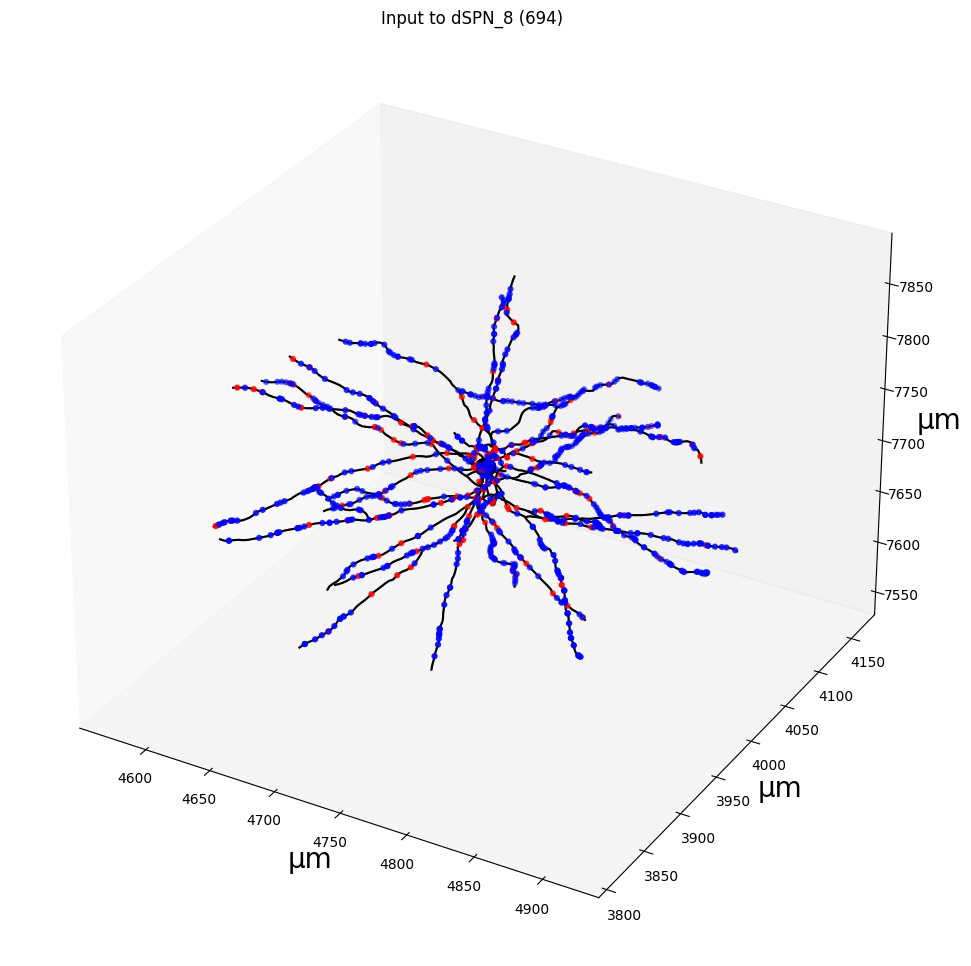

In [15]:
%matplotlib inline
from snudda.plotting.plot_degeneration import PlotDegeneration

# Note here original and degenerate path were the same, so we are plotting the full neuron and its synapses.
pd = PlotDegeneration(original_network_path=network_path_pd0,
                      degenerated_network_path=network_path_pd0)

pd.plot_neuron(neuron_id=neuron_id, figure_size=(12,12), 
               show_internal_synapses=True, hide_axis=False)
#internal synapses are blue
#external synapses are red

Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20220225/PD0 from networks/PD-example-2k_NE/PD0/network-config.json
Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20220225/PD2 from networks/PD-example-2k_NE/PD2/network-synapses.hdf5


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Plotting 200 external synapses
Plotting 132 external synapses
Figure written: networks/PD-example-2k_NE/PD2/figures/input-to-694-dSPN_8-and-internal-synapses.png


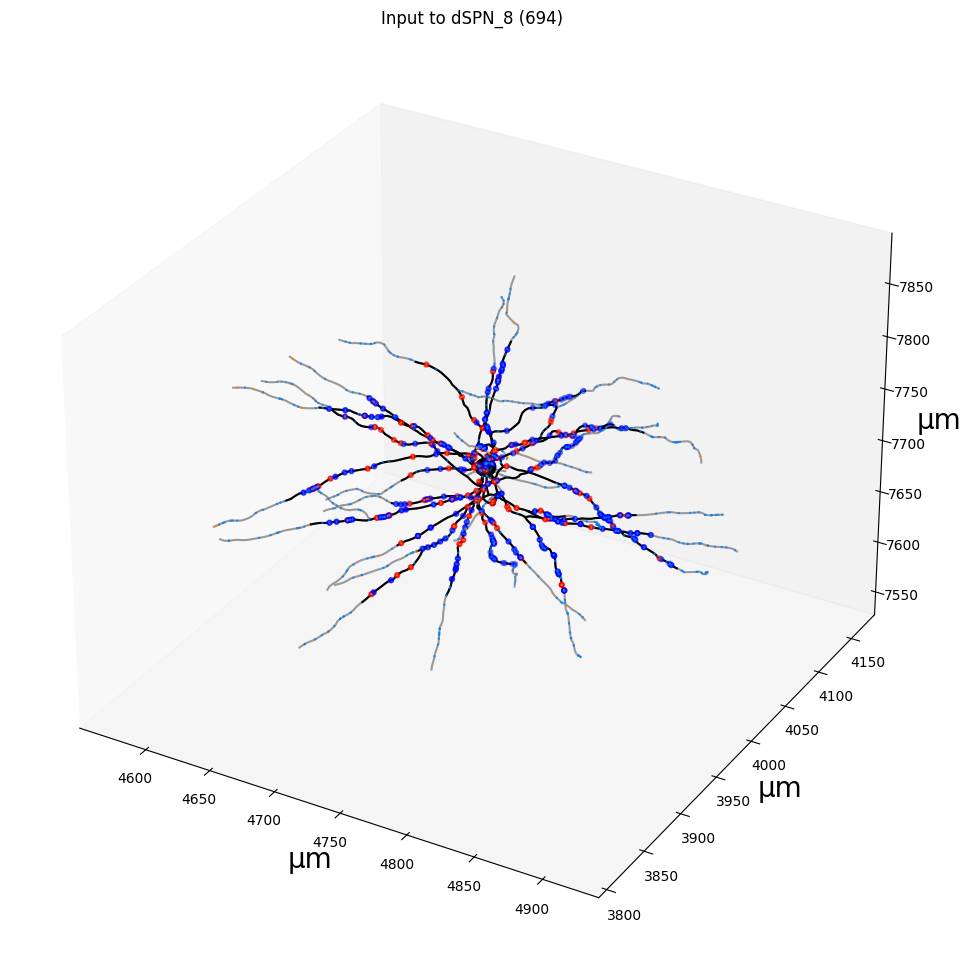

In [16]:
%matplotlib inline
from snudda.plotting.plot_degeneration import PlotDegeneration

pd = PlotDegeneration(original_network_path=network_path_pd0,
                      degenerated_network_path=network_path_pd2)

pd.plot_neuron(neuron_id=neuron_id, figure_size=(12,12), 
               show_internal_synapses=True, hide_axis=False)

Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20220225/PD0 from networks/PD-example-2k_NE/PD0/network-config.json
Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20220225/PD2 from networks/PD-example-2k_NE/PD2-ref/network-config.json


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Plotting 200 external synapses
Plotting 200 external synapses
Figure written: networks/PD-example-2k_NE/PD2-ref/figures/input-to-694-dSPN_8-and-internal-synapses.png


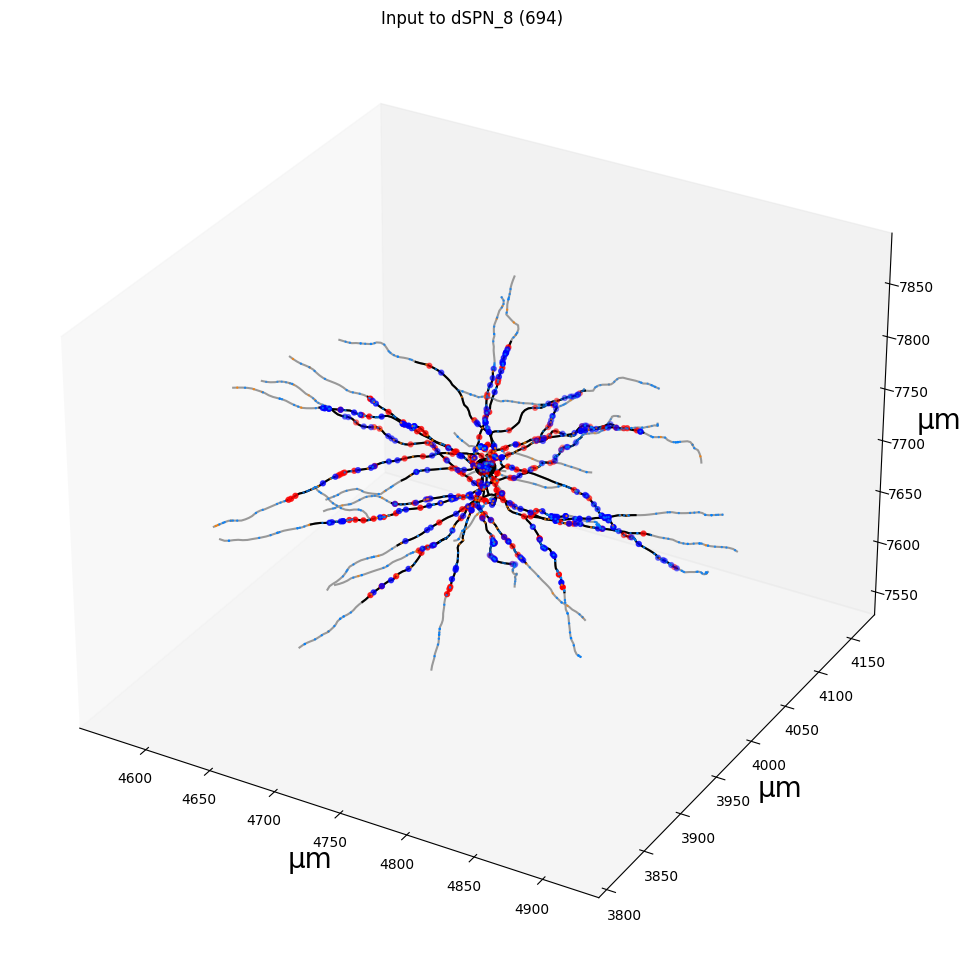

In [17]:
%matplotlib inline
from snudda.plotting.plot_degeneration import PlotDegeneration

pd = PlotDegeneration(original_network_path=network_path_pd0,
                      degenerated_network_path=network_path_pd2_ref)
#neuron_id = 55
pd.plot_neuron(neuron_id=neuron_id, figure_size=(12,12), 
               show_internal_synapses=True, hide_axis=False)

In [18]:
from snudda.analyse.analyse_input import AnalyseInput

pd0_input_info = AnalyseInput(input_file=input_pd0, network_path=network_path_pd0)
pd2_input_info = AnalyseInput(input_file=input_pd2, network_path=network_path_pd2)

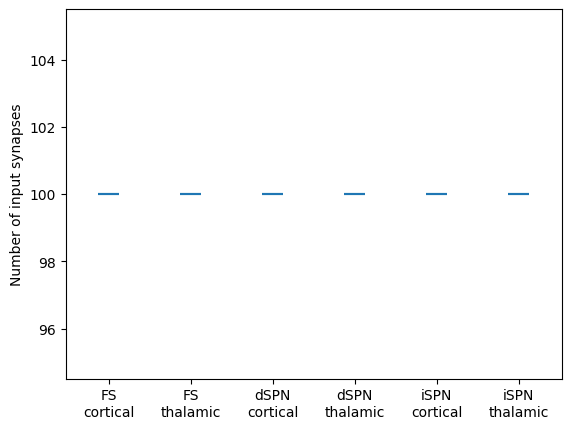

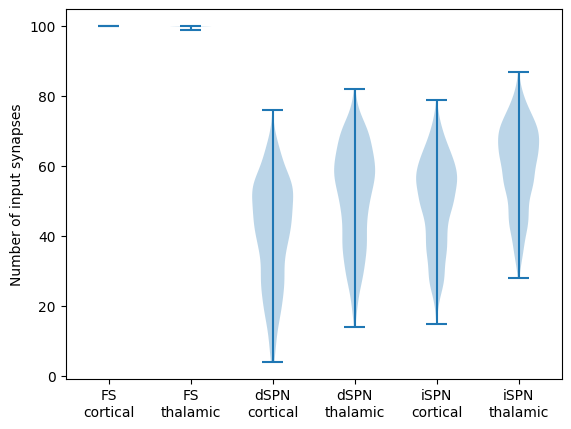

In [19]:
pd0_input_info.plot_input_count("PD0-input_example.png")
pd2_input_info.plot_input_count("PD2-input_example.png")

In [20]:
cmd_str1 = f"snudda_load {network_path_pd0}/network-synapses.hdf5 --countSyn"
cmd_str2 = f"snudda_load {network_path_pd2}/network-synapses.hdf5 --countSyn"
cmd_str3 = f"snudda_load {network_path_pd2_ref}/network-synapses.hdf5 --countSyn"

print("WT")
os.system(cmd_str1)
print("\nPD2")
os.system(cmd_str2)
print("\nPD2 degenerated")
os.system(cmd_str3)

WT
Loading networks/PD-example-2k_NE/PD0/network-synapses.hdf5
Loading config data from HDF5
Loading 1999 neurons with 730326 synapses and 180 gap junctions
Load done. 0.2
ChIN -> LTS: 232 synapses
ChIN -> dSPN: 4452 synapses
ChIN -> iSPN: 5526 synapses
FS -> FS: 323 synapses
FS -> LTS: 18 synapses
FS -> dSPN: 26185 synapses
FS -> iSPN: 16191 synapses
LTS -> ChIN: 451 synapses
LTS -> dSPN: 1619 synapses
LTS -> iSPN: 1135 synapses
dSPN -> ChIN: 177 synapses
dSPN -> dSPN: 145363 synapses
dSPN -> iSPN: 36914 synapses
iSPN -> ChIN: 165 synapses
iSPN -> dSPN: 160501 synapses
iSPN -> iSPN: 331074 synapses

PD2
Loading networks/PD-example-2k_NE/PD2/network-synapses.hdf5
Loading config data from HDF5
Loading 1999 neurons with 312103 synapses and 180 gap junctions
Load done. 0.1
ChIN -> LTS: 240 synapses
ChIN -> dSPN: 1055 synapses
ChIN -> iSPN: 1915 synapses
FS -> FS: 577 synapses
FS -> LTS: 38 synapses
FS -> dSPN: 25707 synapses
FS -> iSPN: 40312 synapses
LTS -> ChIN: 451 synapses
LTS -> dSPN

0

In [21]:
cmd_str1 = f"snudda_load {network_path_pd0}/network-synapses.hdf5 --listPre {neuron_id}"
cmd_str2 = f"snudda_load {network_path_pd2}/network-synapses.hdf5 --listPre {neuron_id}"
cmd_str3 = f"snudda_load {network_path_pd2_ref}/network-synapses.hdf5 --listPre {neuron_id}"

print("WT")
os.system(cmd_str1)
print("\nPD2")
os.system(cmd_str2)
print("\nPD2 degenerated")
os.system(cmd_str3)

WT
Loading networks/PD-example-2k_NE/PD0/network-synapses.hdf5
Loading config data from HDF5
Loading 1999 neurons with 730326 synapses and 180 gap junctions
Load done. 0.1
List neurons pre-synaptic to neuronID = 694 (dSPN_8)
The neuron receives 768 synapses
31 : iSPN_24 (3 synapses)
33 : iSPN_29 (3 synapses)
34 : iSPN_33 (3 synapses)
36 : dSPN_14 (4 synapses)
39 : dSPN_19 (5 synapses)
40 : dSPN_28 (2 synapses)
41 : dSPN_30 (3 synapses)
47 : iSPN_27 (3 synapses)
54 : dSPN_14 (4 synapses)
67 : iSPN_23 (3 synapses)
80 : dSPN_23 (3 synapses)
95 : dSPN_31 (3 synapses)
99 : dSPN_35 (2 synapses)
116 : dSPN_22 (2 synapses)
141 : iSPN_28 (4 synapses)
153 : dSPN_30 (4 synapses)
159 : iSPN_10 (2 synapses)
161 : iSPN_25 (3 synapses)
163 : iSPN_29 (2 synapses)
164 : iSPN_31 (4 synapses)
172 : dSPN_20 (3 synapses)
176 : iSPN_3 (3 synapses)
181 : iSPN_29 (3 synapses)
189 : dSPN_18 (3 synapses)
193 : iSPN_2 (3 synapses)
205 : dSPN_5 (2 synapses)
206 : dSPN_25 (4 synapses)
213 : iSPN_16 (3 synapses)
21

0

Added: 34, removed: 413, kept: 217


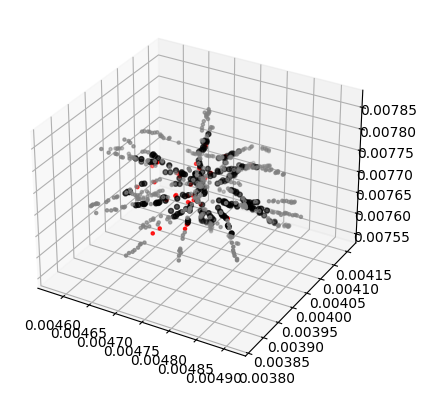

(<Figure size 640x480 with 1 Axes>, <Axes3DSubplot:>)

In [22]:
from snudda.plotting.plot_degeneration_and_growth import PlotDegenerationAndGrowth
pdg = PlotDegenerationAndGrowth(original_network_path=network_path_pd0, 
                                degenerated_network_path=network_path_pd2, 
                                neuron_id=neuron_id)
pdg.plot_synapses()

Added: 165, removed: 555, kept: 75


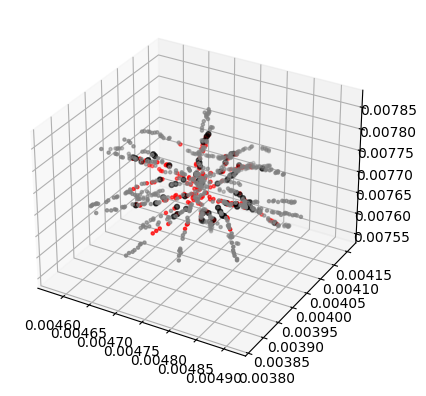

(<Figure size 640x480 with 1 Axes>, <Axes3DSubplot:>)

In [23]:
from snudda.plotting.plot_degeneration_and_growth import PlotDegenerationAndGrowth
pdg = PlotDegenerationAndGrowth(original_network_path=network_path_pd0, 
                                degenerated_network_path=network_path_pd2_ref, 
                                neuron_id=neuron_id)
pdg.plot_synapses()

In [24]:
from snudda.analyse.analyse import SnuddaAnalyse


network_file_pd0 = os.path.join(network_path_pd0, "network-synapses.hdf5")
network_file_pd2 = os.path.join(network_path_pd2, "network-synapses.hdf5")
network_file_pd2_ref = os.path.join(network_path_pd2_ref, "network-synapses.hdf5")

dist3D = False
y_max_H = None

sa_pd0 = SnuddaAnalyse(network_file_pd0)
sa_pd2 = SnuddaAnalyse(network_file_pd2)
sa_pd2_ref = SnuddaAnalyse(network_file_pd2_ref)    

Assuming volume type: cube [cube or full]
Only using 20000 neurons of the connection data
Number of neurons: 1999
Synapse row 0 - 0.0 % time: 0.04792483799974434 seconds
Created connection matrix 0.89101594100066 seconds
GJ row : 0 - 0.0 %  time : 0.00158601200018893 seconds
Created gap junction connection matrix 0.0020200990002194885 seconds
Creating population dictionary
Done.
Taking corner neurons: Keeping 1999/1999
Calculating synapse distance histogram
Creating dist histogram
n_synapses = 730326, at 0
Created distance histogram (optimised) in 0.8541797649995715 seconds
Saving cache to networks/PD-example-2k_NE/PD0/network-synapses.hdf5-cache
Assuming volume type: cube [cube or full]
Only using 20000 neurons of the connection data
Number of neurons: 1999
Synapse row 0 - 0.0 % time: 0.03500156800146215 seconds
Created connection matrix 0.37974304700037464 seconds
GJ row : 0 - 0.0 %  time : 0.0008559240013710223 seconds
Created gap junction connection matrix 0.00131105200125603 secon

Plotting connection probability dSPN to iSPN (synapses)
Centering in None : Keeping 968/968
Counting connections


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1406: RuntimeWarning: invalid value encountered in divide
  p_con = np.divide(count_con, count_all)


Requested: 10000000.0 calculated [937024.]
Plotting connection probability dSPN to iSPN (synapses)
Centering in None : Keeping 968/968
Counting connections
Requested: 10000000.0 calculated [937024.]


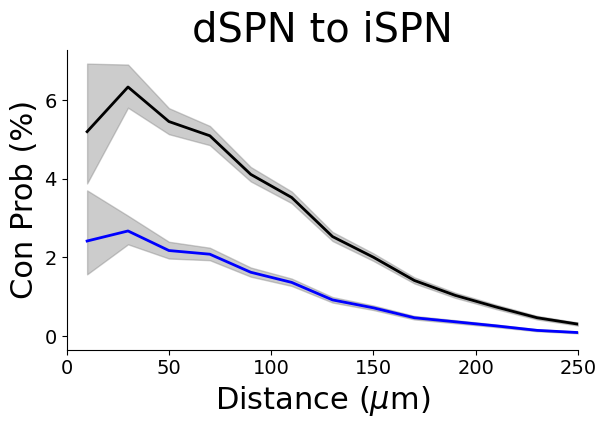

Wrote networks/PD-example-2k_NE/PD2/figures/Network-distance-dependent-connection-probability-dSPN-to-iSPN-synapses-3D-dist.png


({},
 'networks/PD-example-2k_NE/PD2/figures/Network-distance-dependent-connection-probability-dSPN-to-iSPN-synapses-3D-dist.png')

In [25]:
ax = sa_pd0.plot_connection_probability("dSPN", "iSPN", dist_3d=True, return_ax=True, show_plot=False, save_figure=False)
sa_pd2.plot_connection_probability("dSPN", "iSPN", dist_3d=True, ax=ax, colour="blue")

Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in None : Keeping 968/968
Calculating max synapses
Calculating mean synapses
Plotting 14336 connections


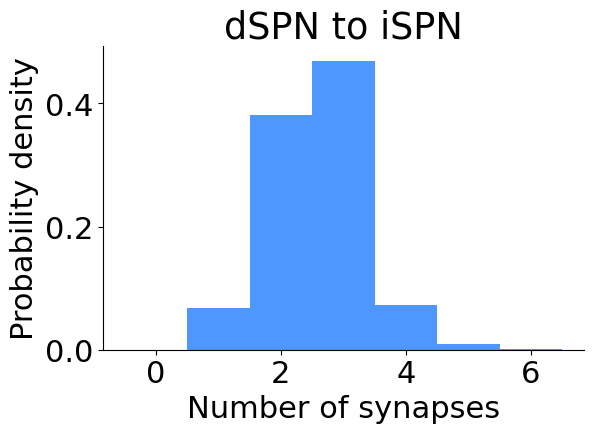

Wrote networks/PD-example-2k_NE/PD0/figures/Network-number-of-synapses-from-dSPN-to-iSPN-per-cell.png
Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in None : Keeping 968/968
Calculating max synapses
Calculating mean synapses
Plotting 5333 connections


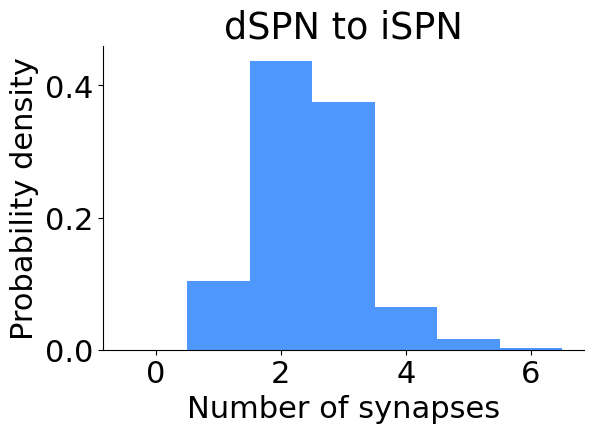

Wrote networks/PD-example-2k_NE/PD2/figures/Network-number-of-synapses-from-dSPN-to-iSPN-per-cell.png


In [26]:
sa_pd0.plot_num_synapses_per_pair("dSPN", "iSPN")
sa_pd2.plot_num_synapses_per_pair("dSPN", "iSPN")

Plotting connection probability dSPN to dSPN (synapses)
Centering in None : Keeping 968/968
Counting connections
Requested: 10000000.0 calculated [936056.]
Plotting connection probability dSPN to dSPN (synapses)
Centering in None : Keeping 968/968
Counting connections
Requested: 10000000.0 calculated [936056.]


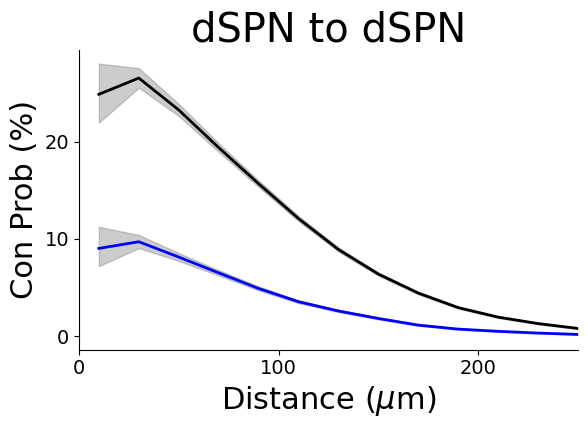

Wrote networks/PD-example-2k_NE/PD2/figures/Network-distance-dependent-connection-probability-dSPN-to-dSPN-synapses-3D-dist.png
Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in None : Keeping 968/968
Calculating max synapses
Calculating mean synapses
Plotting 48775 connections


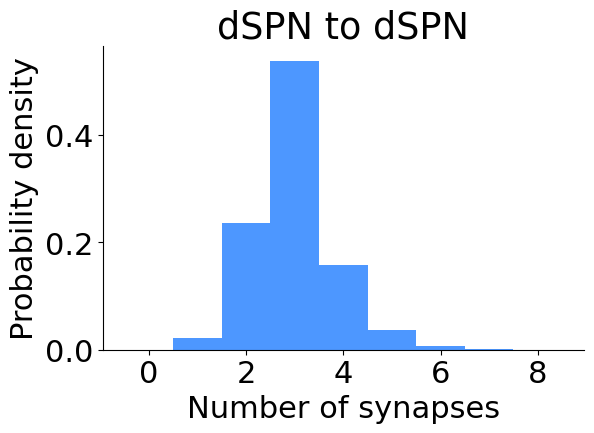

Wrote networks/PD-example-2k_NE/PD0/figures/Network-number-of-synapses-from-dSPN-to-dSPN-per-cell.png
Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in None : Keeping 968/968
Calculating max synapses
Calculating mean synapses
Plotting 14496 connections


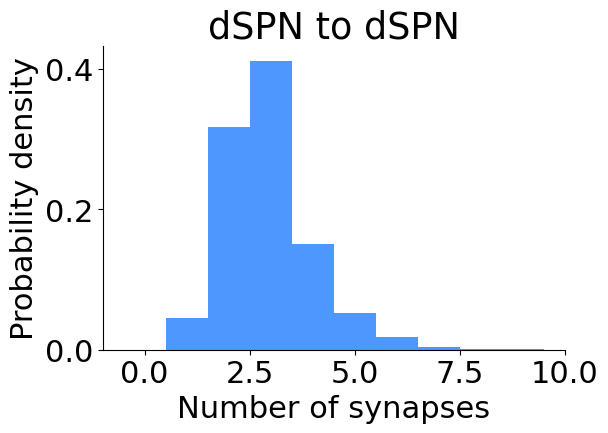

Wrote networks/PD-example-2k_NE/PD2/figures/Network-number-of-synapses-from-dSPN-to-dSPN-per-cell.png


In [27]:
sa_pd0.plot_connection_probability("dSPN", "dSPN", dist_3d=True, return_ax=True, show_plot=False, save_figure=False)
sa_pd2.plot_connection_probability("dSPN", "dSPN", dist_3d=True, ax=ax, colour="blue")

sa_pd0.plot_num_synapses_per_pair("dSPN", "dSPN")
sa_pd2.plot_num_synapses_per_pair("dSPN", "dSPN")


Plotting connection probability iSPN to iSPN (synapses)
Centering in None : Keeping 968/968
Counting connections
Requested: 10000000.0 calculated [936056.]
Plotting connection probability iSPN to iSPN (synapses)
Centering in None : Keeping 968/968
Counting connections
Requested: 10000000.0 calculated [936056.]


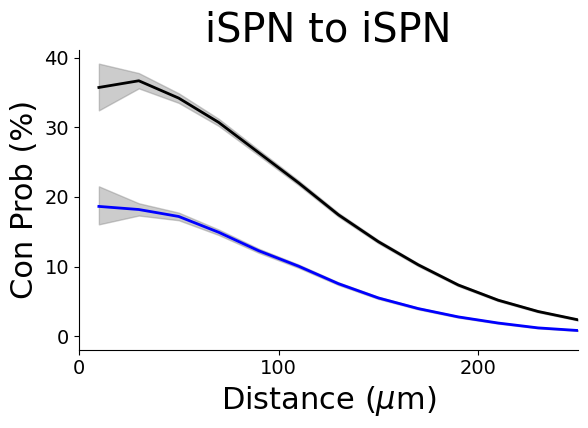

Wrote networks/PD-example-2k_NE/PD2/figures/Network-distance-dependent-connection-probability-iSPN-to-iSPN-synapses-3D-dist.png
Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in None : Keeping 968/968
Calculating max synapses
Calculating mean synapses
Plotting 95492 connections


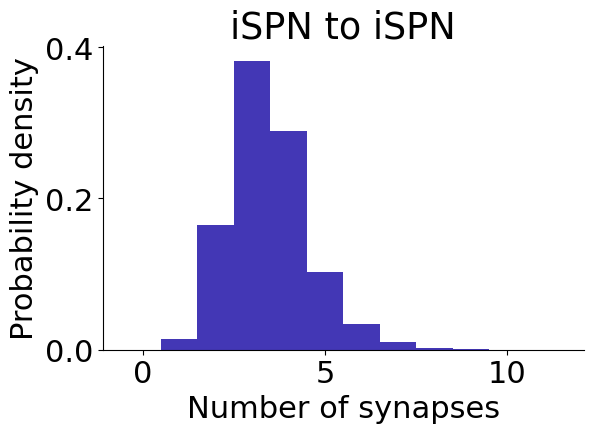

Wrote networks/PD-example-2k_NE/PD0/figures/Network-number-of-synapses-from-iSPN-to-iSPN-per-cell.png
Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in None : Keeping 968/968
Calculating max synapses
Calculating mean synapses
Plotting 41039 connections


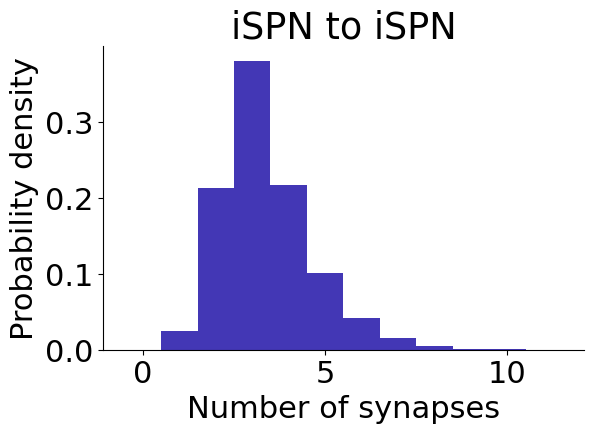

Wrote networks/PD-example-2k_NE/PD2/figures/Network-number-of-synapses-from-iSPN-to-iSPN-per-cell.png


In [28]:
sa_pd0.plot_connection_probability("iSPN", "iSPN", dist_3d=True, return_ax=True, show_plot=False, save_figure=False)
sa_pd2.plot_connection_probability("iSPN", "iSPN", dist_3d=True, ax=ax, colour="blue")

sa_pd0.plot_num_synapses_per_pair("iSPN", "iSPN")
sa_pd2.plot_num_synapses_per_pair("iSPN", "iSPN")

Plotting connection probability iSPN to dSPN (synapses)
Centering in None : Keeping 968/968
Counting connections
Requested: 10000000.0 calculated [937024.]
Plotting connection probability iSPN to dSPN (synapses)
Centering in None : Keeping 968/968
Counting connections
Requested: 10000000.0 calculated [937024.]


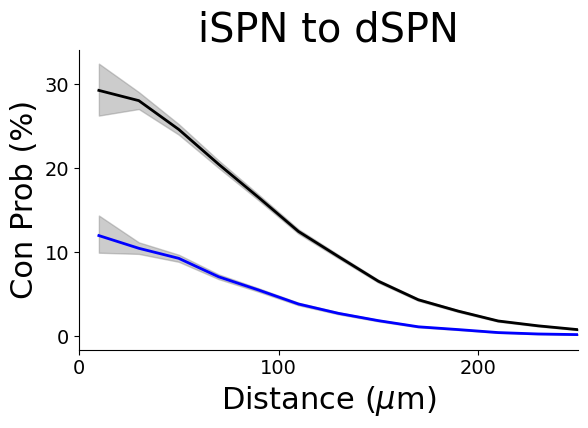

Wrote networks/PD-example-2k_NE/PD2/figures/Network-distance-dependent-connection-probability-iSPN-to-dSPN-synapses-3D-dist.png
Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in None : Keeping 968/968
Calculating max synapses
Calculating mean synapses
Plotting 50749 connections


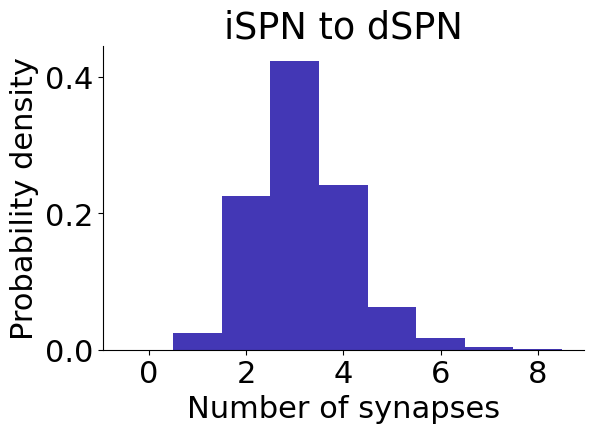

Wrote networks/PD-example-2k_NE/PD0/figures/Network-number-of-synapses-from-iSPN-to-dSPN-per-cell.png
Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in None : Keeping 968/968
Calculating max synapses
Calculating mean synapses
Plotting 15570 connections


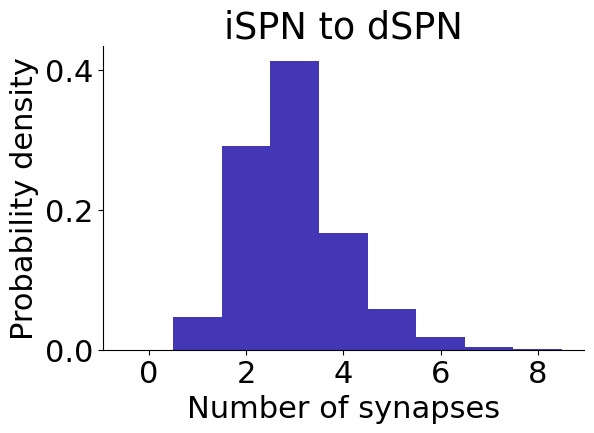

Wrote networks/PD-example-2k_NE/PD2/figures/Network-number-of-synapses-from-iSPN-to-dSPN-per-cell.png


In [29]:
sa_pd0.plot_connection_probability("iSPN", "dSPN", dist_3d=True, return_ax=True, show_plot=False, save_figure=False)
sa_pd2.plot_connection_probability("iSPN", "dSPN", dist_3d=True, ax=ax, colour="blue")

sa_pd0.plot_num_synapses_per_pair("iSPN", "dSPN")
sa_pd2.plot_num_synapses_per_pair("iSPN", "dSPN")

Plotting connection probability FS to FS (synapses)
Centering in None : Keeping 27/27
Counting connections
Requested: 10000000.0 calculated [702.]
Plotting connection probability FS to FS (synapses)
Centering in None : Keeping 27/27
Counting connections
Requested: 10000000.0 calculated [702.]


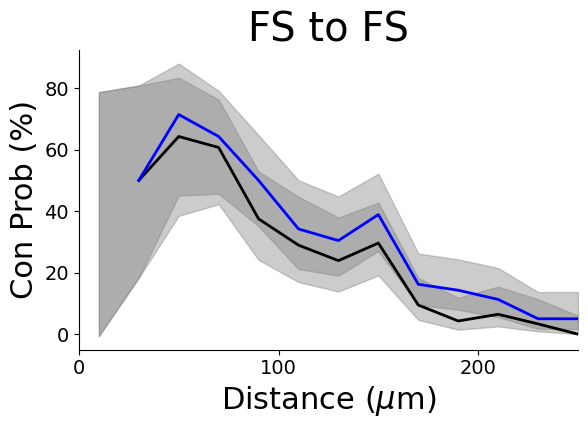

Wrote networks/PD-example-2k_NE/PD2/figures/Network-distance-dependent-connection-probability-FS-to-FS-synapses-3D-dist.png
Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in None : Keeping 27/27
Calculating max synapses
Calculating mean synapses
Plotting 98 connections


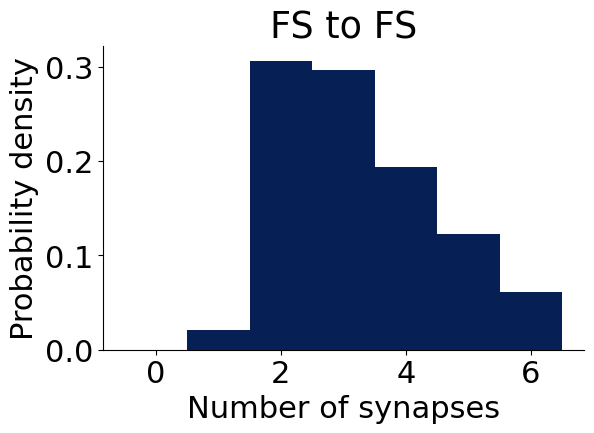

Wrote networks/PD-example-2k_NE/PD0/figures/Network-number-of-synapses-from-FS-to-FS-per-cell.png
Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in None : Keeping 27/27
Calculating max synapses
Calculating mean synapses
Plotting 135 connections


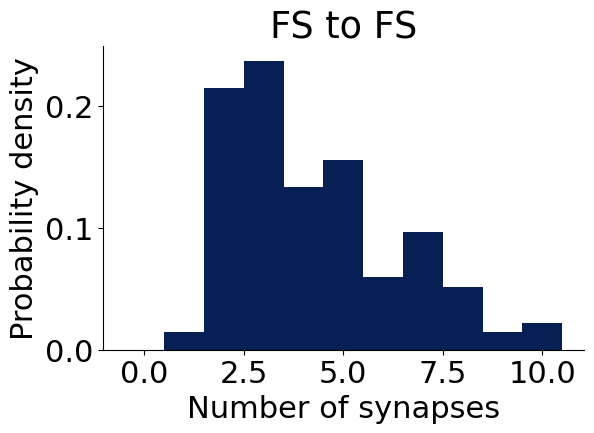

Wrote networks/PD-example-2k_NE/PD2/figures/Network-number-of-synapses-from-FS-to-FS-per-cell.png


In [30]:
sa_pd0.plot_connection_probability("FS", "FS", dist_3d=True, return_ax=True, show_plot=False, save_figure=False)
sa_pd2.plot_connection_probability("FS", "FS", dist_3d=True, ax=ax, colour="blue")

sa_pd0.plot_num_synapses_per_pair("FS", "FS")
sa_pd2.plot_num_synapses_per_pair("FS", "FS")

Plotting connection probability FS to iSPN (synapses)
Centering in None : Keeping 968/968
Counting connections
Requested: 10000000.0 calculated [26136.]
Plotting connection probability FS to iSPN (synapses)
Centering in None : Keeping 968/968
Counting connections
Requested: 10000000.0 calculated [26136.]


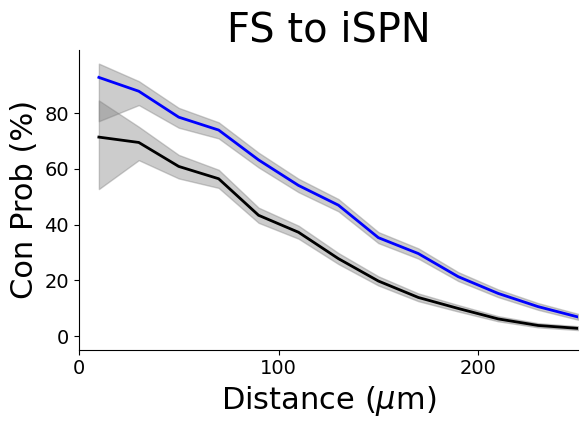

Wrote networks/PD-example-2k_NE/PD2/figures/Network-distance-dependent-connection-probability-FS-to-iSPN-synapses-3D-dist.png
Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in None : Keeping 968/968
Calculating max synapses
Calculating mean synapses
Plotting 4098 connections


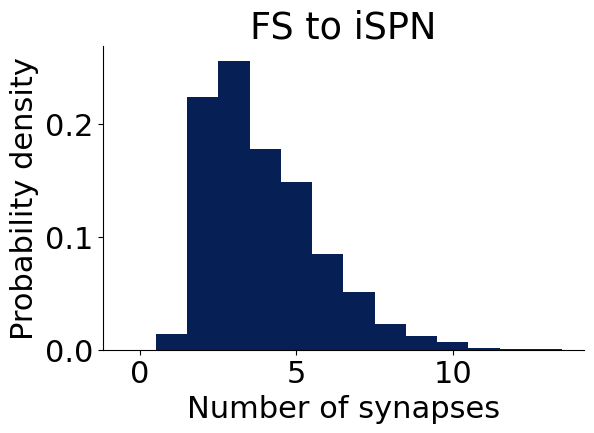

Wrote networks/PD-example-2k_NE/PD0/figures/Network-number-of-synapses-from-FS-to-iSPN-per-cell.png
Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in None : Keeping 968/968
Calculating max synapses
Calculating mean synapses
Plotting 6901 connections


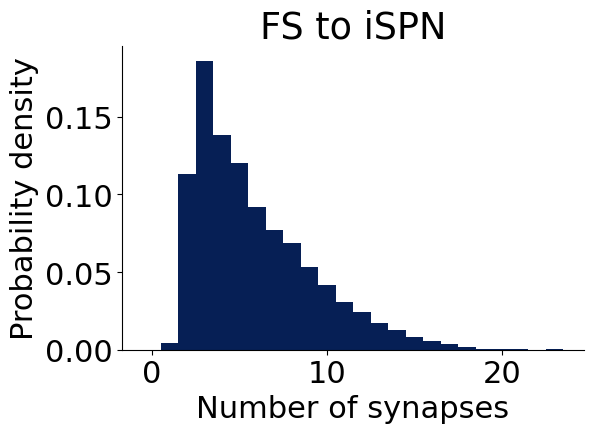

Wrote networks/PD-example-2k_NE/PD2/figures/Network-number-of-synapses-from-FS-to-iSPN-per-cell.png


In [31]:
sa_pd0.plot_connection_probability("FS", "iSPN", dist_3d=True, return_ax=True, show_plot=False, save_figure=False)
sa_pd2.plot_connection_probability("FS", "iSPN", dist_3d=True, ax=ax, colour="blue")

sa_pd0.plot_num_synapses_per_pair("FS", "iSPN")
sa_pd2.plot_num_synapses_per_pair("FS", "iSPN")

Plotting connection probability FS to dSPN (synapses)
Centering in None : Keeping 968/968
Counting connections
Requested: 10000000.0 calculated [26136.]
Plotting connection probability FS to dSPN (synapses)
Centering in None : Keeping 968/968
Counting connections
Requested: 10000000.0 calculated [26136.]


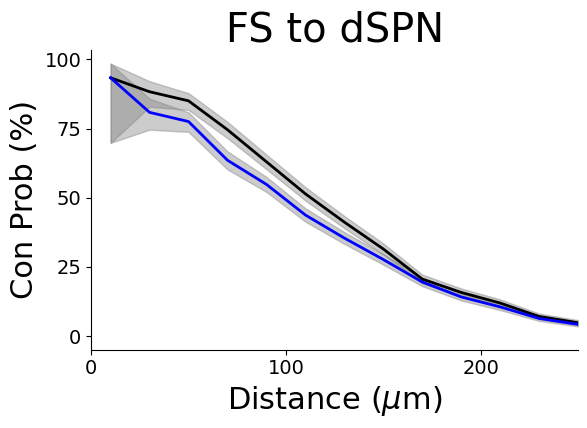

Wrote networks/PD-example-2k_NE/PD2/figures/Network-distance-dependent-connection-probability-FS-to-dSPN-synapses-3D-dist.png
Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in None : Keeping 968/968
Calculating max synapses
Calculating mean synapses
Plotting 6003 connections


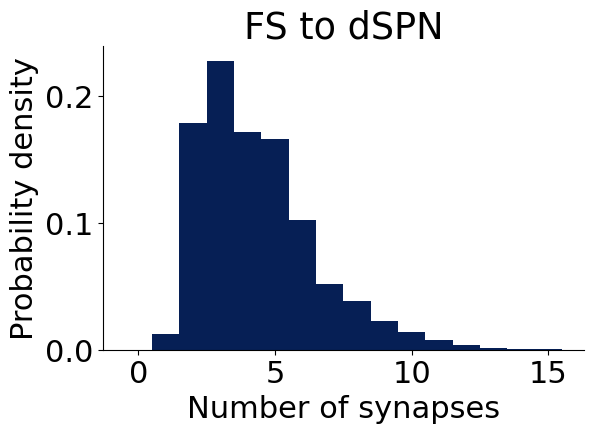

Wrote networks/PD-example-2k_NE/PD0/figures/Network-number-of-synapses-from-FS-to-dSPN-per-cell.png
Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in None : Keeping 968/968
Calculating max synapses
Calculating mean synapses
Plotting 5277 connections


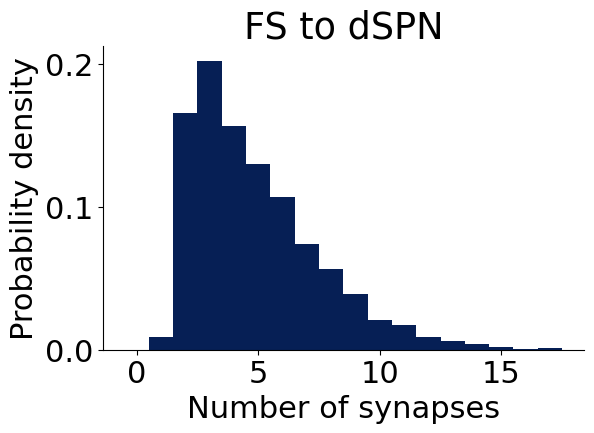

Wrote networks/PD-example-2k_NE/PD2/figures/Network-number-of-synapses-from-FS-to-dSPN-per-cell.png


In [32]:
sa_pd0.plot_connection_probability("FS", "dSPN", dist_3d=True, return_ax=True, show_plot=False, save_figure=False)
sa_pd2.plot_connection_probability("FS", "dSPN", dist_3d=True, ax=ax, colour="blue")

sa_pd0.plot_num_synapses_per_pair("FS", "dSPN")
sa_pd2.plot_num_synapses_per_pair("FS", "dSPN")